###### Introduction to Network Analysis 2023/24 (iii)

## Advanced network algorithms, random graph models

You are given four networks in Pajek format.

+ Tiny toy network for testing ([toy.net](http://lovro.fri.uni-lj.si/ina/nets/toy.net))
+ Zachary karate club network ([karate_club.net](http://lovro.fri.uni-lj.si/ina/nets/karate_club.net))
+ IMDb actors collaboration network ([collaboration_imdb.net](http://lovro.fri.uni-lj.si/ina/nets/collaboration_imdb.net))
+ A small part of Google web graph ([www_google.net](http://lovro.fri.uni-lj.si/ina/nets/www_google.net))

In [1]:
import networkx as nx
import numpy as np

### II. Average node clustering coefficient



1. **(discuss)** Study the following algorithm for computing the node clustering coefficients $\{C\}$ by link triad counting. Why does the algorithm count triads over the links and not over the nodes? What is the time complexity of the algorithm?

	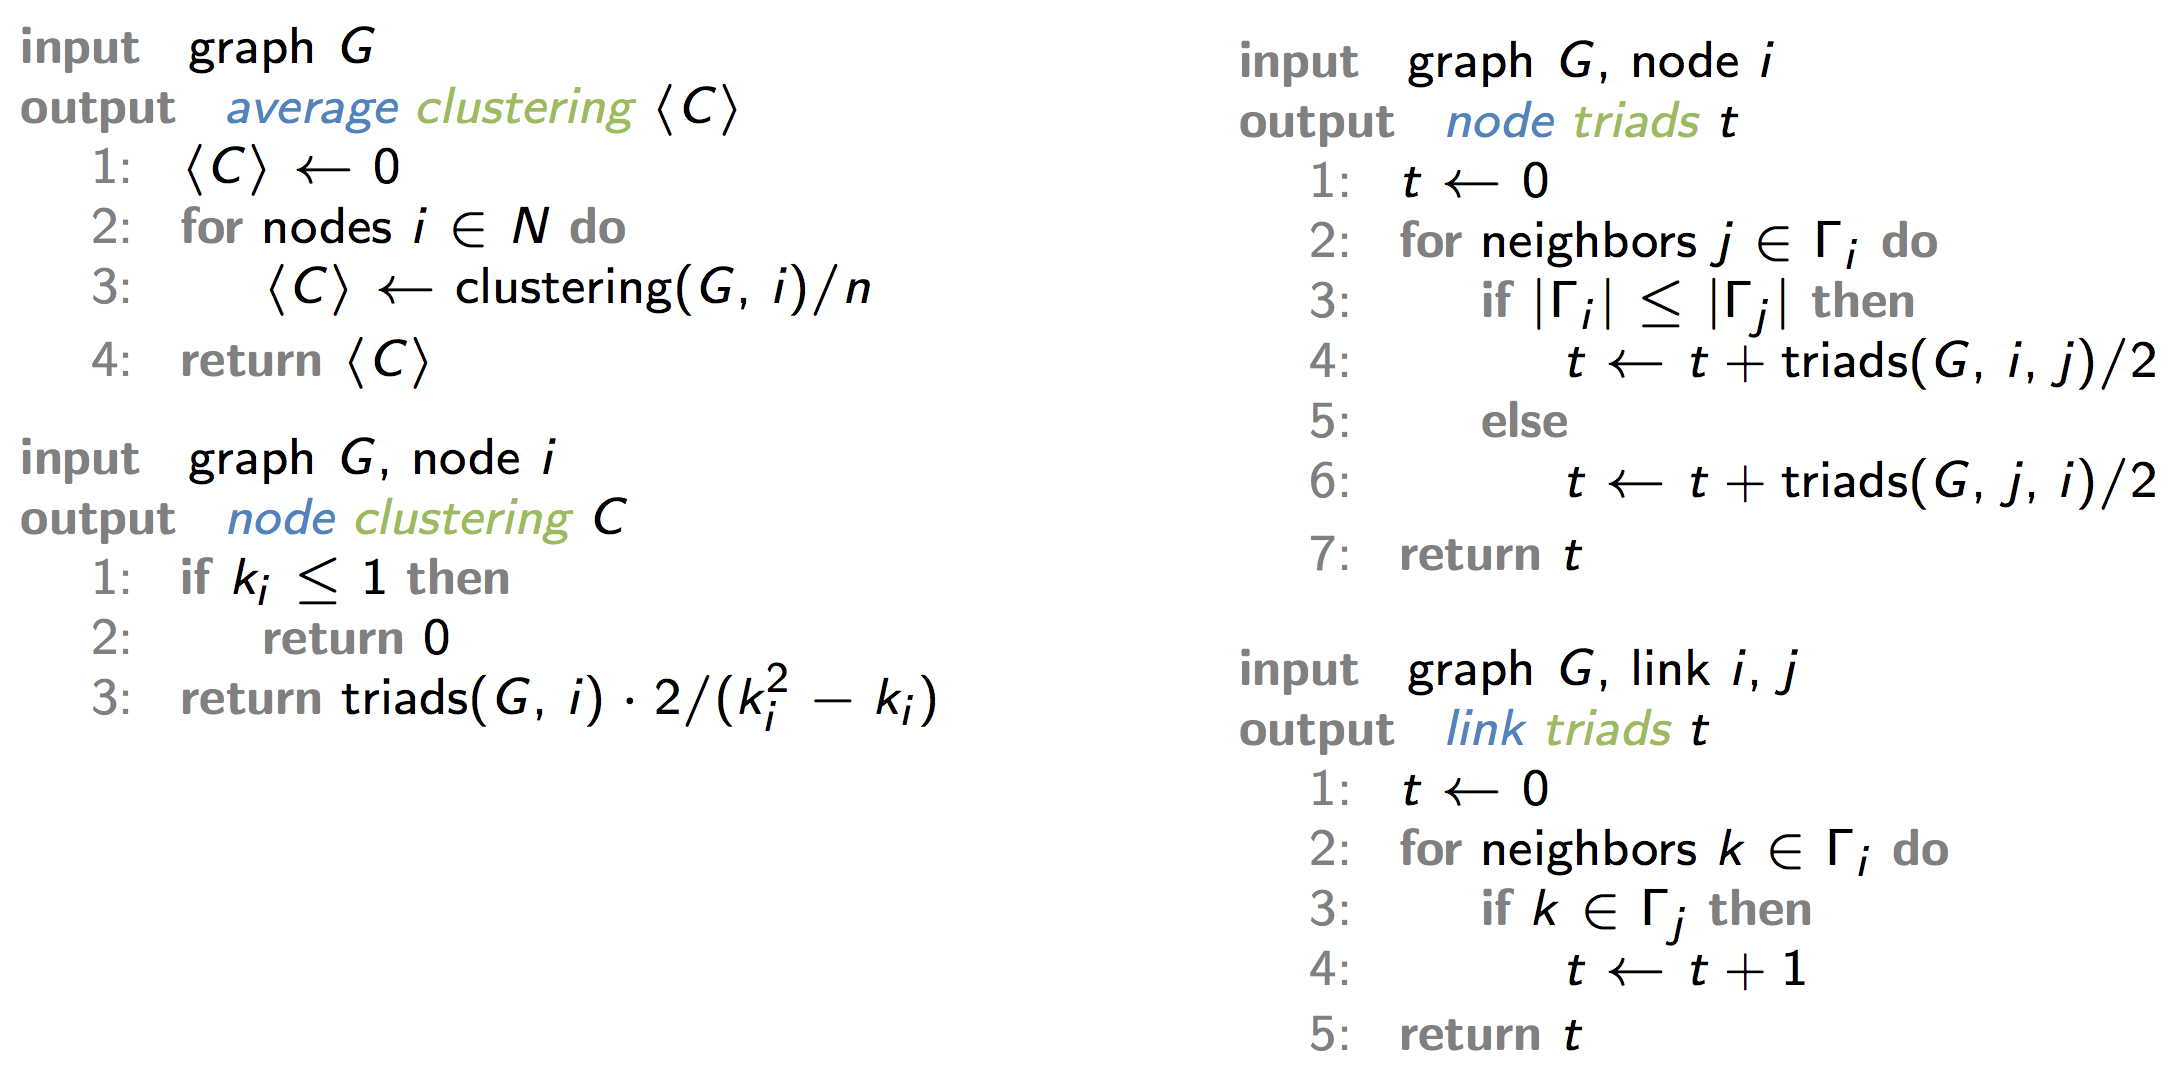



A triad is a set of three nodes connected by two or three edges. By counting triads over the links, the algorithm avoids redundant computations. Instead of considering all possible triads involving a node and examining the connections between the nodes within the triad, the algorithm focuses on the links directly. This approach eliminates the need to repeatedly traverse and analyze the neighboring nodes, resulting in a more efficient computation of clustering coefficients. Naive algorithm would have time complexity of $ O(n\langle k^2 \rangle)$. If we instad always explore the neighborhood with less neighbors, the complexity decreases to $O(m\langle k \rangle)$ or equally $O(n\langle k \rangle^2)$. We can see a bit cleaner implementation of the function bellow.

**NOTE**: clustering coefficient is ambiguous for multigraphs

2. **(homework)** Implement the algorithm and compute the average node clustering coefficient $\langle C\rangle$ of all four networks. Are the results expected?



In [3]:
def avg_clustering(G: nx.Graph) -> float:
    neighbor_set = {i: set(G.neighbors(i)) for i in G}

    def triangles_between(low_deg_node: int, high_deg_node: int) -> int:
        t = 0
        for k in G[low_deg_node]:
            t += k in neighbor_set[high_deg_node]
        return t

    def triangles_around(i: int) -> int:
        t = 0
        for j in G[i]:
            if G.degree[i] <= G.degree[j]:
                t += triangles_between(i, j)
            else:
                t += triangles_between(j, i)

        return t / 2 # double counting

    def node_clustering(i: int) -> float:
        k = G.degree[i]
        if k <= 1:
            return 0
        else:
            return triangles_around(i) * 2 / (k*k - k)

    return np.mean([node_clustering(i) for i in G])


for name in ["toy", "karate_club", "collaboration_imdb", "www_google"]:
    G = nx.read_pajek(f"./networks/{name}.net")
    G = nx.Graph(G)
    G.name = name

    c_our = avg_clustering(G)
    c_nx = nx.average_clustering(G)

    print(f"---- {name} ----")
    print(f"our coefficient: {c_our:.2f}")
    print(f"nx coefficient: {c_nx:.2f}")
    print()

---- toy ----
our coefficient: 0.47
nx coefficient: 0.47

---- karate_club ----
our coefficient: 0.57
nx coefficient: 0.57

---- collaboration_imdb ----
our coefficient: 0.34
nx coefficient: 0.34

---- www_google ----
our coefficient: 0.51
nx coefficient: 0.51



From the lectures, we find the following table:

| Graph                 | Clustering coeff.|
|-----------------------|------------------|
| Facebook circles      | 0.60             |
| American football     | 0.40             |
| Internet map          | 0.16             |
| Actors Collaboration  | 0.78             |

Similarly, we obtain the following distances above:

| Graph               | Clustering coeff.|
|---------------------|------------------|
| Toy                 | 0.47             |
| Karate club         | 0.57             |
| Colaboration IMDB   | 0.34             |
| WWW Google          | 0.51             |

The results are expected, we see that none of the graphs stands out from the average.

3. **(discuss)** What kind of network representation is required by the algorithm?

The required network representation is adjancency list implemented with sets, since we need a representation that can efficiently check if two nodes are adjacent. In case of sets, the operation is O(1).